# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod


# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data   


Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [2]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
def heapify(arr, n, i): #Not sure if needed or not
    largest = i  
    l = 2 * i + 1  
    r = 2 * i + 2  
  
    if l < n and arr[i] < arr[l]:
        largest = l
  
    if r < n and arr[largest] < arr[r]:
        largest = r
  
    if largest != i:
        (arr[i], arr[largest]) = (arr[largest], arr[i])  

        heapify(arr, n, largest)

def heapSort(arr):
    n = len(arr)
  
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
  
  
    for i in range(n - 1, 0, -1):
        (arr[i], arr[0]) = (arr[0], arr[i])  # swap
        heapify(arr, i, 0)

Use the cell below to implement the requested API by means of **sequential search**.

In [ ]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.array = []        
     
    
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        #for i in len(self.array):
        #    if element < self.array[i]:
        #        self.array.insert(i, element)
        #        inserted = True
        #        break
        if element in self.array:
            inserted = False
        else:
            self.array.append(element)
            inserted = True
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        for i in self.array:
            if i == element:
                found = True
                break
        
        return found

def takingTime(codeToExecInString, numberOfExecution):
    code = codeToExecInString
    executionTime = timeit.timeit(code, globals = globals(), number=numberOfExecution)
#     print(f"Execution Time: {executionTime} seconds")
    return executionTime

file = open("/Users/alexionugroho/Desktop/class/Algorithm/Archive/testfiles/test3-dickens.txt" , "r")
data = file.read().split()
file.close()

file2 = open("/Users/alexionugroho/Desktop/class/Algorithm/Archive/testfiles/test-search.txt" , "r")
data2 = file2.read().split()
file2.close()

ar = SequentialSearchSet()
x = []
y = []
for num in range(len(data)):
    if num % 100000 == 1:
        x.append(num)
        ti = timeit.Timer(lambda: ar.insertElement(data[num]))
        y.append(ti.timeit(number=1))
    else:
        ar.insertElement(data[num])



xs = []
ys = []
for num in range(len(data2)):
    if num % 10 == 1:
        xs.append(num)
        ti = timeit.Timer(lambda: ar.searchElement(data2[num]))
        ys.append(ti.timeit(number=1))
    else:
        ar.searchElement(data2[num])

print(ys)
fig, (iplot, splot) = plt.subplots(2)
iplot.plot(x, y)
iplot.set_title("Insert Operation")

splot.plot(xs, ys)
splot.set_title("Search Operation")

# ar.array = []
# print(ar.insertElement(9))
# print(ar.searchElement(5))
# print(ar.searchElement(9))

Use the cell below to implement the requested API by means of **binary search tree**.

<function matplotlib.pyplot.show(close=None, block=None)>

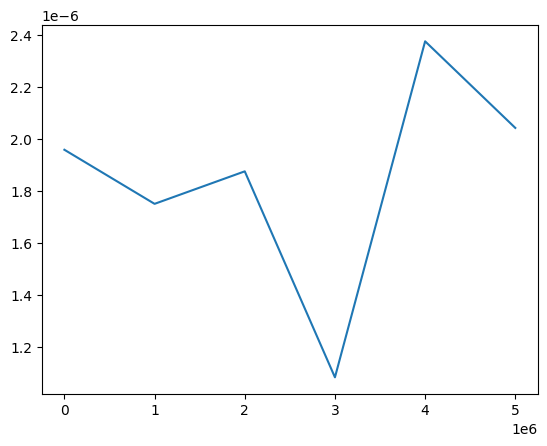

In [13]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        self.root = None
             
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
        new_node = Node(element)
        if self.root == None:
            self.root = new_node
            return True
        else:
            curr = self.root
            while True:
                if curr.key == element:
                    return False
                if element < curr.key:
                    if curr.left is None:
                        curr.left = new_node
                        return True
                    else:
                        curr = curr.left
                else:
                    if curr.right is None:
                        curr.right = new_node
                        return True
                    else:
                        curr = curr.right
            
        return inserted  

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE
        curr = self.root
        while curr is not None:
            if curr.key == element:
                return True
            elif element < curr.key:
                curr = curr.left
            else:
                curr = curr.right
        return found

def takingTime(codeToExecInString, numberOfExecution):
    code = codeToExecInString
    executionTime = timeit.timeit(code, globals = globals(), number=numberOfExecution)
#     print(f"Execution Time: {executionTime} seconds")
    return executionTime


file = open("/Users/alexionugroho/Desktop/class/Algorithm/Archive/testfiles/test3-dickens.txt" , "r")
data = file.read().split()
file.close()

file2 = open("/Users/alexionugroho/Desktop/class/Algorithm/Archive/testfiles/test-search.txt" , "r")
data2 = file2.read().split()
file2.close()

tree = BinarySearchTreeSet()
x = []
y = []
for num in range(len(data)):
    if num % 100000 == 1:
        x.append(num)
        ti = timeit.Timer(lambda: tree.insertElement(data[num]))
        y.append(ti.timeit(number=1))
    else:
        tree.insertElement(data[num])

plt.plot(x, y)
plt.show


# print(tree.key)
# print(tree.left.key)

    
# tree = BinarySearchTreeSet()
# print(tree.insertElement(4))
# print(tree.insertElement(3))
# print(tree.insertElement(1))
# print(tree.insertElement(2))
# print(tree.insertElement(8))
# print(tree.root.key)
# print(tree.root.right.key)
# print(tree.root.left.key)
# print(tree.searchElement(7))

Use the cell below to implement the requested API by means of **balanced search tree**.

In [ ]:
class BalancedSearchTreeSet(AbstractSet):
    
    def __init__(self, key=(None, None)):
        # ADD YOUR CODE HERE
        self.key = key
        self.left = (None, None)
        self.right = (None, None)
        self.mid = (None, None)

        
        pass           
     
    
        
    def insertElement(self, element):
        inserted = False
        # ADD YOUR CODE HERE
      
        
        return inserted
    
    

    def searchElement(self, element):     
        found = False
        # ADD YOUR CODE HERE

        
        return found    

Use the cell below to implement the requested API by means of **bloom filter**.

[6.124999345047399e-06, 6.0420006775530055e-06, 2.749999111983925e-06, 2.6249999791616574e-06, 2.5839999580057338e-06, 2.583001332823187e-06, 2.6249999791616574e-06, 2.749999111983925e-06, 2.5000008463393897e-06, 2.499999027349986e-06, 2.7500009309733286e-06, 2.5829995138337836e-06, 7.499984349124134e-07, 2.958000550279394e-06, 2.6249999791616574e-06, 2.5420013116672635e-06, 2.54199949267786e-06, 2.458000381011516e-06, 2.6249999791616574e-06, 2.5829995138337836e-06, 3.541001206031069e-06, 2.6670004444895312e-06, 2.4579985620221123e-06, 2.6249999791616574e-06, 2.6249999791616574e-06, 2.5829995138337836e-06, 2.5839999580057338e-06, 2.708000465645455e-06, 2.6249999791616574e-06, 7.500002539018169e-07, 2.415999915683642e-06, 2.4169985408661887e-06, 2.4579985620221123e-06, 2.499999027349986e-06, 5.830006557516754e-07, 2.5420013116672635e-06, 2.3749998945277184e-06, 2.499999027349986e-06, 2.458000381011516e-06, 2.458000381011516e-06, 2.6249999791616574e-06, 2.458000381011516e-06, 2.582999513

Text(0.5, 1.0, 'Search Operation')

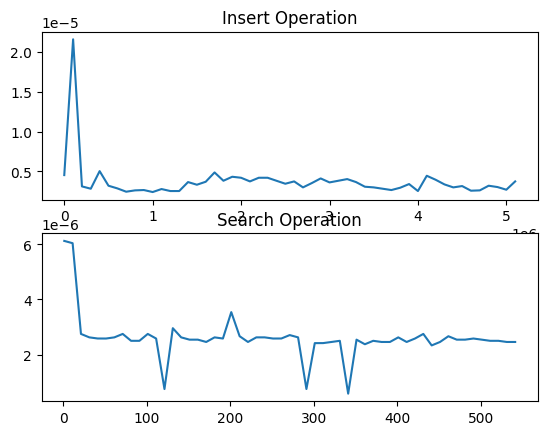

In [32]:
from bitarray import bitarray
import timeit
from matplotlib import pyplot as plt


class BloomFilterSet(AbstractSet):
    def __init__(self, word_num=0):
        # ADD YOUR CODE HERE
        # initialize an empty bitarray
        bit_num = int(-word_num*(self.ln(0.001)) / (self.ln(2)**2))
        self.num_hashes = int(bit_num / word_num * self.ln(2))
        self.bitfield = bitarray(bit_num)
        self.bitfield.setall(0)
    
    @staticmethod
    def ln(x):
        n = 1000.0
        return n * ((x ** (1/n)) - 1)
    
    def get_index(self, key):
        return hash(key) % len(self.bitfield)
        
    def insertElement(self, element):
        # ADD YOUR CODE HERE
        for i in range(self.num_hashes):
            index = self.get_index(element + str(i))
            self.bitfield[index] = True
        return True
    

    def searchElement(self, element):     
        # ADD YOUR CODE HERE
        for i in range(self.num_hashes):
            index = self.get_index(element + str(i))
            if not self.bitfield[index]:
                return False
        return True

def takingTime(codeToExecInString, numberOfExecution):
    code = codeToExecInString
    executionTime = timeit.timeit(code, globals = globals(), number=numberOfExecution)
#     print(f"Execution Time: {executionTime} seconds")
    return executionTime

file = open("/Users/alexionugroho/Desktop/class/Algorithm/Archive/testfiles/test3-dickens.txt" , "r")
data = file.read().split()
file.close()

file2 = open("/Users/alexionugroho/Desktop/class/Algorithm/Archive/testfiles/test-search.txt" , "r")
data2 = file2.read().split()
file2.close()

bf = BloomFilterSet(len(data))
x = []
y = []
for num in range(len(data)):
    if num % 100000 == 1:
        x.append(num)
        ti = timeit.Timer(lambda: bf.insertElement(data[num]))
        y.append(ti.timeit(number=1))
    else:
        bf.insertElement(data[num])



xs = []
ys = []
for num in range(len(data2)):
    if num % 10 == 1:
        xs.append(num)
        ti = timeit.Timer(lambda: bf.searchElement(data2[num]))
        ys.append(ti.timeit(number=1))
    else:
        bf.searchElement(data2[num])

print(ys)
fig, (iplot, splot) = plt.subplots(2)
iplot.plot(x, y)
iplot.set_title("Insert Operation")

splot.plot(xs, ys)
splot.set_title("Search Operation")
# print("Time for Searching")
# for word in data:
#     takingTime("bf.searchElement(word)", 1)

# print(bf.searchElement("always"))
# print(bf.searchElement("alexio"))
# print(bf.searchElement("david"))
# print(bf.searchElement("eight"))
# print(bf.searchElement("alcohol"))

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [8]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        # ADD YOUR CODE HERE
        
        
        pass           
        
    def generateData(self, size):     
        # ADD YOUR CODE HERE
        data = [""]*size
        for i in range(size):
            lgth = random.randint(1, 10)
            for j in range(lgth):
                data[i] += (random.choice(string.ascii_lowercase))
        
        return data   

test = TestDataGenerator()
print(test.generateData(100))

['kxpsqxpt', 'g', 'b', 'gbarpbj', 'o', 'lwqazfavsb', 'yzemyrrzr', 'ttfcmeswa', 'hiamzmync', 'qngditlxnj', 'p', 'qgwmb', 'pkswrjk', 'w', 'psikq', 'bdnpyfqo', 'zhtd', 'e', 'bgpbnaiqfq', 'j', 'x', 'gfhdsoo', 'uomp', 'rpsfsm', 'qzghermg', 'nzrt', 'yotycg', 'y', 'hrca', 'zl', 'nvmzcarl', 'yij', 'zdtu', 'bopdo', 'umcqqt', 'ckkssvgte', 'dfpzorjyb', 'szzhf', 'lxvih', 'ramhcgtve', 'wmysssx', 'hhbxtltwj', 'dbkfchnqtc', 'ppacrajyqm', 'dhrouwaldk', 'hldbabdl', 'ns', 'ljbz', 'uah', 'fctpmgzkzv', 'gbyavosmx', 'edinfocr', 'kvnqelvfk', 'gzv', 'y', 'uawl', 'jvgmfidx', 'gdq', 'nllbff', 'yehlkzdq', 'sn', 'mam', 'mjhjwd', 'n', 'lgllgbecua', 'fpzte', 'ovvobs', 'engz', 'x', 'rnonf', 'jdgvm', 'al', 'msfvwgqa', 'wffkman', 'ukhdzapjuk', 'algxk', 'uwmnantkr', 'lsslr', 'wsphxr', 'qmaradyq', 'nlkplpmnd', 'uejegjmqe', 'zaszhvzxfu', 'ry', 'ex', 'hcilw', 'w', 'qwpwdx', 've', 'zieaalw', 'uco', 'awruqd', 'rw', 'wxb', 'ydeu', 'rrw', 'wlgxy', 'zqocskt', 'zhj', 'mtzbrjeywt']


Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [32]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON REAL DATA
# SequentialSearchTree
# Inserting
file = open(input("enter the file name: "), "r")
arr = SequentialSearchSet()
for line in file:
    for word in line.split():
        arr.array.append(word)
file.close()

# Searching (Need to open file again)
print(arr.searchElement("always"))
print(arr.searchElement("asjfhouawhfoqwainfasp"))
print(arr.array)

# BinarySearchTree
file = open(input("enter the file name: "), "r")
data = file.read().split()
tree = BinarySearchTreeSet(data[0])
for num in range(1, len(data)):
    tree.insertElement(data[num])
file.close()

print(tree.key)
print(tree.left.key)

# BloomFilterSet
# Inserting

enter the file name: dunnon ma g


FileNotFoundError: [Errno 2] No such file or directory: 'dunnon ma g'

In [9]:
import timeit

# ADD YOUR TEST CODE HERE TO WORK ON SYNTHETIC DATA



